# Classification

분류(Classification)는 지도학습(Supervised Learning)의 일종으로, 주어진 데이터를 여러 클래스(Class) 중 하나에 할당하는 문제입니다.

### 종류

- 로지스틱회귀-선형회귀
- KNN-K-NearestNeighbors
- Decision Tree - 의사결정 트리
- RandomForest - 의사결정 트리 기반 앙상블
- Xgboost - 의사결정 트리 기반 앙상블
- Support Vector Machine - 서포트 벡터 머신

## Data set & Preprocessing

사용 데이터 셋: Wine Data set [다양한 특성을 이용하여 와인의 품질 측정]

### 데이터 확인

In [1]:
import pandas as pd
from sklearn.datasets import load_wine

wine = load_wine()
df_x = pd.DataFrame(wine.data)
df_y = wine.target
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


### Feature Selection

Pearson Correlation을 이용한 특성 선택
- `pd.concat`: 두 데이터 프레임 통합
- `pd.DataFrame`: 데이터 프레임 생산
- `corr()`: 상관계수 계산
- `abs()`: 절대값
- `plot.bar()`: 막대 그래프 생성

<Axes: >

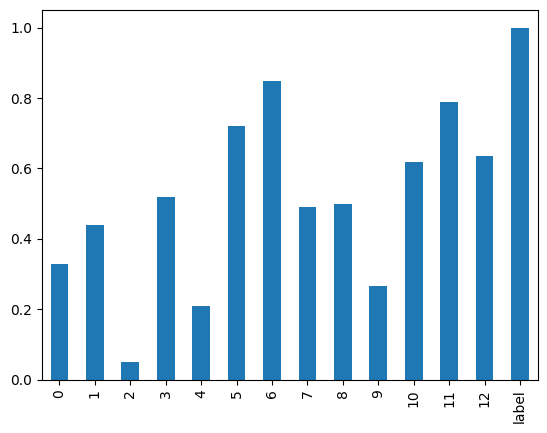

In [2]:
df_corr = pd.concat([df_x, pd.DataFrame(df_y, columns=['label'])], axis=1)
df_corr.corr()['label'].abs().plot.bar()

상관계수가 0.4 이상인 특성 선택

In [3]:
corr = df_corr.corr()['label'].abs()
df_columns = corr[corr >= 0.4][:-1].index

### 정규화 및 Data set 분리

#### 정규화
Standard Scaler를 사용해서 정규화

#### 훈련 데이터셋 분리
- 모델의 학습하기 위한 데이터셋과 모델을 검증하기 위한 데이터셋으로 분리
- `train_test_split`: 훈련 데이터 분리
- `test_size`: 검증 데이터 비율

In [4]:
df_x = df_x[df_columns]

# 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_x = scaler.fit_transform(df_x)

# 훈련 데이터셋 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

## 분류 성

### 로지스틱스 회귀

> 로지스틱 회귀(Logistic Regression)는 주로 입력 데이터를 이진 분류하는 데에 쓰이는 통계학적인 기법

로지스틱 회귀는 선형 회귀와 관련이 있지만, 선형 회귀와는 다른 방식으로 작동

`classification_report`: 분류에서 사용하는 다양한 평가지표를 계산

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 로지스틱 회귀 모델 생성
logreg = LogisticRegression()

# 모델 학습
logreg.fit(x_train, y_train)

# 예측
y_pred = logreg.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      0.92      0.92        12
           2       0.93      1.00      0.97        14

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



### KNN

주어진 샘플 데이터들을 기반으로, 새로운 입력 데이터가 주어졌을 때,가장 가까운 K개의 이웃 데이터들을 찾아서 다수결 방식으로 분류하는 알고리즘

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# KNN 모델 생성
knn = KNeighborsClassifier()

# 모델 학습
knn.fit(x_train, y_train)

# 예측
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.91      0.83      0.87        12
           2       0.93      1.00      0.97        14

    accuracy                           0.92        36
   macro avg       0.91      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



### 의사결정 트리

의사결정 나무는 데이터의 특징들 중 하나의 특징을 선택하여 해당 특징의 값을 기준으로 데이터를 분할
이러한 분할 작업을 재귀적으로 반복하며 학습을 진행

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 의사결정 트리 모델 생성
decision_tree = DecisionTreeClassifier()

# 모델 학습
decision_tree.fit(x_train, y_train)

# 예측
y_pred = decision_tree.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.89      0.67      0.76        12
           2       0.82      1.00      0.90        14

    accuracy                           0.86        36
   macro avg       0.87      0.86      0.86        36
weighted avg       0.87      0.86      0.86        36



### 번외. 의사결정 트리 시각화

In [8]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(decision_tree, out_file=None,
                           feature_names=df_columns.to_list(),
                           class_names=wine.target_names,
                           filled=True,
                           rounded=True,
                           special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

### Random Forest

> 의사결정나무를 개별 모형으로 사용하는 앙상블 학습 방법 중 하나

랜덤 포레스트는 여러 개의 의사결 정나무를 만들고, 각각의 의사결정 나무의 결과를 다수결 방식으로 이용하여 최종적인 예측 결과를 도출

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 랜덤 포레스트 모델 생성
random_forest = RandomForestClassifier()

# 모델 학습
random_forest.fit(x_train, y_train)

# 에측
y_pred = random_forest.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      0.92      0.92        12
           2       0.93      1.00      0.97        14

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



### Xgboost(eXtreme Gradient Boosting)

> Gradient Boosting 알고리즘을 기반으로 한 앙상블(Ensemble) 학습 방법 중 하나

Gradient Boosting 알고리즘은 이전 모델의 오차를 다음 모델이 보완하는 방식으로, Xgboost는 이를 강화한 학습 방식
강력하고 학습 시간이 높은 것이 특징!

In [10]:
import xgboost
from sklearn.metrics import classification_report

# Xgboost 모델 생성
xgb = xgboost.XGBClassifier()

# 모델 학습
xgb.fit(x_train, y_train)

# 예측
y_pred = xgb.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.90      0.75      0.82        12
           2       0.82      1.00      0.90        14

    accuracy                           0.89        36
   macro avg       0.91      0.88      0.89        36
weighted avg       0.90      0.89      0.89        36



### Support Vector Machine

> 데이터를 분류할 때, 데이터 간의 간격(margin)을 최대화하는 결정 경계(decision boundary)를 찾는 것이 목표

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# SVM 모델 생성
svm = SVC()

# 모델 학습
svm.fit(x_train, y_train)

# 예측
y_pred = svm.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      0.92      0.92        12
           2       0.93      1.00      0.97        14

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



## 교차 검증

일반화 성능을 평가하기 위해 교차 검증을 사용한다. 교차 검증은 데이터를 여러 개의 폴드(fold)로 나누어, 각각의 폴드를 검증용 데이터와 학습용 데이터로 사용하여 모델을 평가하여 평균을 이용

대표적으로는 K-fold 알고리즘

In [12]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier()

# 5-fold 교차 검증
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# SVM 모델 학습 및 검증
for train_idx, test_idx in k_fold.split(wine.data):
    x_train, x_test = wine.data[train_idx], wine.data[test_idx]
    y_train, y_test = wine.target[train_idx], wine.target[test_idx]
    random_forest.fit(x_train, y_train)
    score = random_forest.score(x_test, y_test)
    print("Accuracy: ", score)

Accuracy:  0.9722222222222222
Accuracy:  0.9722222222222222
Accuracy:  0.9722222222222222
Accuracy:  1.0
Accuracy:  1.0


## 하이퍼 파라미터 최적화

> 머신 러닝 모델 학습 과정에서 모델의 성능을 높이기 위해 하이퍼 파라미터 값을 조정하는 작업

하이퍼파라미터는 모델을 학습할 때 사람이 직접 설정해야 하는 변수 (ex. Random Forest의 트리 개수)

#### 종류
- 그리드 탐색
- 랜덤 탐색

### 그리드 탐색

사용 가능한 하이퍼 파라미터의 조합을 모두 만들어 이를 순차적으로 모두 시도하는 방법이다. 모든 조합을 시도하므로 최적값을 찾을 확률이 높지만, 시도 해야 할 경우의 수가 많아지면 계산 비용이 크게 증가한다.

K-fold 방식을 기본적으로 지원하며, 멀티 코어를 이용하는 학습도 지원

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# 랜덤 포레스트 분류기 객체 생성
random_forest = RandomForestClassifier()

# 하미퍼 파라미터 후보군 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 그리드 탐색을 수행할 객체 생성
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=5,
    scoring=['accuracy', 'f1', 'roc_auc'],
    refit='accuracy',
    n_jobs=-1,
    verbose=3
)

# 그리드 탐색 수행
grid_search.fit(x_train, y_train)
# 최적 파라미터 출력
print("Best parameters: ", grid_search.best_params_)
# 최적 파라미터를 사용한 모델의 성능 출력
y_pred = grid_search.predict(x_test)

print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_score
    return fbeta_score(
  File "/Users/jcw/Develop/DataAnalysisLecture/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1287, in fbeta_score
    _, _, f, _ = precis

Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



### 랜덤 탐색

하이퍼 파라미터 값을 랜덤으로 지정하여 탐색하는 방법입니다. 그리드 탐색에 비해 계산 비용이 낮고, 랜덤하게 탐색하므로 최적값을 찾을 확률도 높다.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import classification_report

# 랜덤 포레스트 모델 생성
random_forest = RandomForestClassifier()

# 탐색할 하미퍼 파라미터 공간 설정
param_dist = {
    'n_estimators': randint(10, 100),
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# 랜덤 탐색 객체 생성
random_search = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=20, cv=5)

# 랜덤 탐색 수행
random_search.fit(x_train, y_train)

# 최적 하이퍼 파라미터 출력
print("Best parameters: ", random_search.best_params_)

# 최적 파라미터를 사용한 모델의 성능 출력
y_pred = random_search.predict(x_test)
print(classification_report(y_test, y_pred))

Best parameters:  {'bootstrap': False, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 34}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35

